In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download yasserh/titanic-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 68.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('tennis-weather.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip show dtreeviz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from dtreeviz.trees import dtreeviz
from IPython.display import SVG

data = pd.read_csv('Titanic-Dataset.csv')
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = 'Survived'
data = data[features+[target]]

data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
bool_cols = ['Sex_male', 'Embarked_Q', 'Embarked_S']
data[bool_cols] = data[bool_cols].astype(int)

x = data.drop(target,axis=1)
y = data[target]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train = x_train.astype(float)
x_test = x_test.astype(float)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()
viz = dtreeviz(model,
               x_train,
               y_train,
               target_name=target,
               feature_names=x_train.columns.tolist(),
               class_names=['Died', 'Survived']
)

viz.save("titatic_tree.svg")



Accuracy: 0.7821229050279329


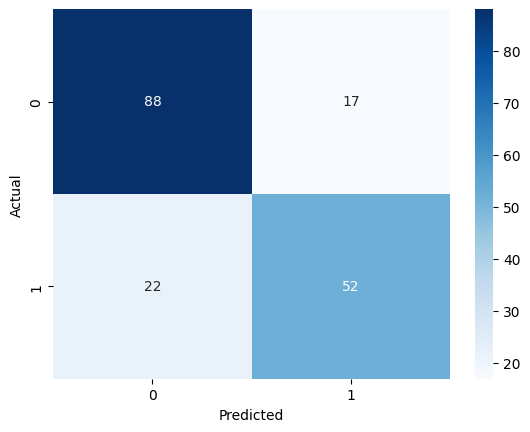

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB


data = pd.read_csv('Titanic-Dataset.csv')
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = 'Survived'
data = data[features + [target]]

data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
bool_cols = ['Sex_male', 'Embarked_Q', 'Embarked_S']
data[bool_cols] = data[bool_cols].astype(int)

X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
  !kaggle datasets download pranavpandey2511/tennis-weather

Dataset URL: https://www.kaggle.com/datasets/pranavpandey2511/tennis-weather
License(s): unknown
  0% 0.00/286 [00:00<?, ?B/s]
100% 286/286 [00:00<00:00, 996kB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('tennis.csv')
data.head()
data['play'].value_counts()
#prior probability.
p_yes = data['play'].value_counts()['yes']/len(data)
p_no = data['play'].value_counts()['no']/len(data)

#LikelyHood.
#outlook.
pd.crosstab(data['outlook'],data['play'])
p_overcast_yes = 4/9
p_rain_yes = 3/9
p_sunny_yes = 2/9

p_overcast_no = 0/5
p_rain_no = 2/5
p_sunny_no = 3/5

#temp.
pd.crosstab(data['temp'],data['play'])
p_cool_yes = 3/9
p_hot_yes = 2/9
p_mild_yes = 4/9

p_cool_no = 1/5
p_hot_no = 2/5
p_mild_no = 2/5

#Humidity.
pd.crosstab(data['humidity'],data['play'])
p_high_yes = 3/9
p_normal_yes = 6/9

p_high_no = 4/5
p_normal_no = 1/5

#Windy.
pd.crosstab(data['windy'],data['play'])
p_true_yes = 3/9
p_false_yes = 6/9

p_true_no = 3/5
p_false_no = 2/5

#Posterior Probability.
#outlook sunny,temp cool,humidity high,windy false.
p_yes_x = p_yes * p_sunny_yes * p_cool_yes * p_high_yes * p_false_yes
p_no_x = p_no * p_sunny_no * p_cool_no * p_high_no * p_false_no

#print(p_yes_x>p_no_x)
if p_yes_x>p_no_x:
  print("yes")
else:
  print("no")


no


Accuracy:  0.6666666666666666
Error:  0.3333333333333333


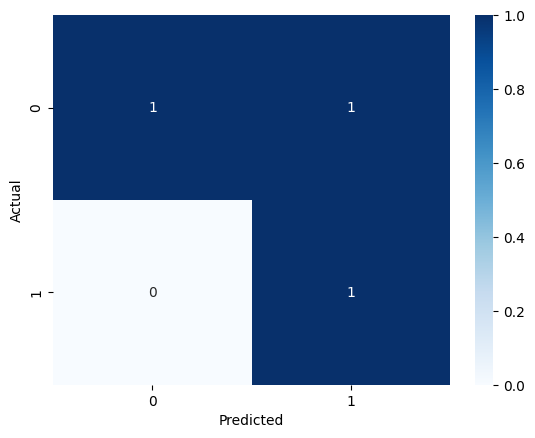

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('tennis.csv')
label = LabelEncoder()
categorical_data = ['outlook','temp','humidity','windy','play']
for col in categorical_data:
  data[col] = label.fit_transform(data[col])

x = data.drop('play',axis=1)
y = data['play']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)
# model = GaussianNB()
model = BernoulliNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Error: ",mean_absolute_error(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
x = iris.data
y = iris.target

feature = iris.feature_names
target = iris.target_names

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
print("Accuracy: ",accuracy_score(y_test,y_pred))




Accuracy:  0.9333333333333333


Accuracy:  0.9


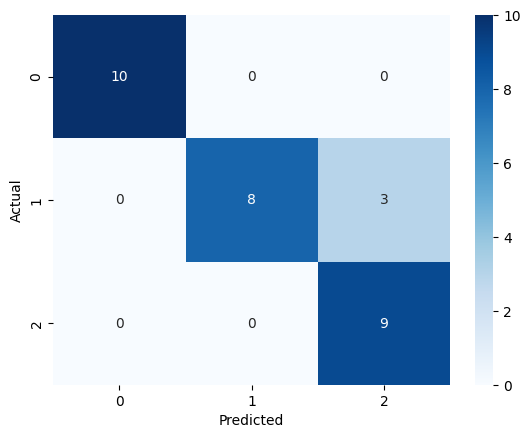

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y = iris.target

feature = iris.feature_names
target = iris.target_names

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = SVC(kernel='rbf',gamma = 'scale')
model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
print("Accuracy: ",accuracy_score(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy:  0.6666666666666666


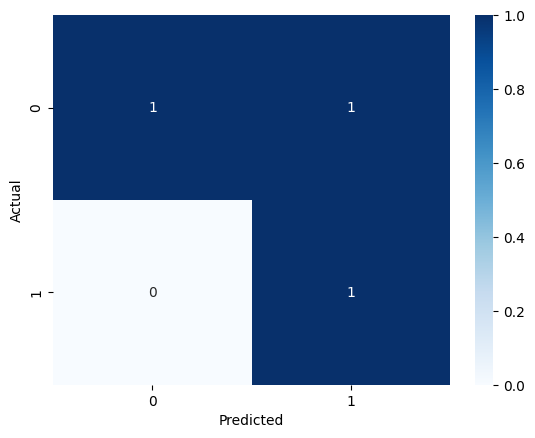

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('tennis.csv')
label = LabelEncoder()
categorical_data = ['outlook','temp','humidity','windy','play']
for col in categorical_data:
  data[col] = label.fit_transform(data[col])

x = data.drop('play',axis = 1)
y = data['play']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd',cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
